In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('../data/clean_hcmc_waq.csv')

In [3]:


def detailed_eda(df):
    """
    Perform detailed EDA addressing specific analytical questions
    """
    # Convert datetime and create time-based features
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['hour'] = df['date_time'].dt.hour
    df['month'] = df['date_time'].dt.month
    df['season'] = pd.cut(df['month'], 
                         bins=[0,3,6,9,12], 
                         labels=['Winter', 'Spring', 'Summer', 'Fall'])
    
    # 1. Temperature Comfort Analysis
    plt.figure(figsize=(12, 6))
    plt.scatter(df['temperature_2m'], df['apparent_temperature'], 
               alpha=0.5, c=df['relative_humidity_2m'])
    plt.colorbar(label='Relative Humidity (%)')
    plt.xlabel('Actual Temperature (°C)')
    plt.ylabel('Apparent Temperature (°C)')
    plt.title('Temperature Perception vs Actual Temperature')
    plt.show()
    
    # 2. Hourly Temperature Patterns
    temp_hourly = df.groupby('hour')[['temperature_2m', 'relative_humidity_2m', 'dew_point_2m']].mean()
    plt.figure(figsize=(12, 6))
    temp_hourly.plot()
    plt.title('Average Daily Patterns')
    plt.xlabel('Hour of Day')
    plt.show()
    
    # 3. Pollution vs Weather
    weather_pollution = df.groupby('weather_status')[
        ['pm2_5', 'pm10', 'temperature_2m', 'wind_speed_10m']].mean()
    print("\nPollution levels by weather condition:\n", weather_pollution)
    
    # 4. Pollutant Correlations
    pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
                  'sulphur_dioxide', 'ozone']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[pollutants].corr(), annot=True, cmap='RdYlBu')
    plt.title('Pollutant Correlations')
    plt.show()
    
    # 5. Wind Analysis
    plt.figure(figsize=(10, 10))
    plt.scatter(df['wind_direction_10m'], df['wind_speed_10m'], 
               c=df['pm2_5'], cmap='viridis', alpha=0.5)
    plt.colorbar(label='PM2.5')
    plt.xlabel('Wind Direction')
    plt.ylabel('Wind Speed')
    plt.title('Wind Patterns and PM2.5 Levels')
    plt.show()
    
    # 6. Cloud Cover Effects
    cloud_effects = df.groupby(pd.qcut(df['cloud_cover'], 4))[
        ['temperature_2m', 'precipitation', 'pm2_5']].mean()
    print("\nEffects of Cloud Cover:\n", cloud_effects)
    
    # 7. Seasonal Patterns
    seasonal_patterns = df.groupby('season')[pollutants + ['us_aqi']].mean()
    print("\nSeasonal Pollution Patterns:\n", seasonal_patterns)
    
    # 8. AQI Analysis
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='season', y='us_aqi', data=df)
    plt.title('AQI Distribution by Season')
    plt.show()
    
    # 9. Vapor Pressure Analysis
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='vapour_pressure_deficit', 
                   y='relative_humidity_2m', hue='temperature_2m')
    plt.title('Vapor Pressure Deficit vs Humidity')
    plt.show()
    
    # 10. Extreme Weather Impact
    extreme_impact = df.groupby('weather_status')[pollutants].agg(['mean', 'std'])
    print("\nPollution Statistics by Weather Status:\n", extreme_impact)
    
    return {
        'temp_comfort_corr': df['temperature_2m'].corr(df['apparent_temperature']),
        'pollution_weather_corr': df[pollutants].corrwith(df['temperature_2m']),
        'aqi_summary': df.groupby('season')['us_aqi'].describe(),
        'extreme_conditions': df[df['us_aqi'] > df['us_aqi'].quantile(0.95)]['weather_status'].value_counts()
    }

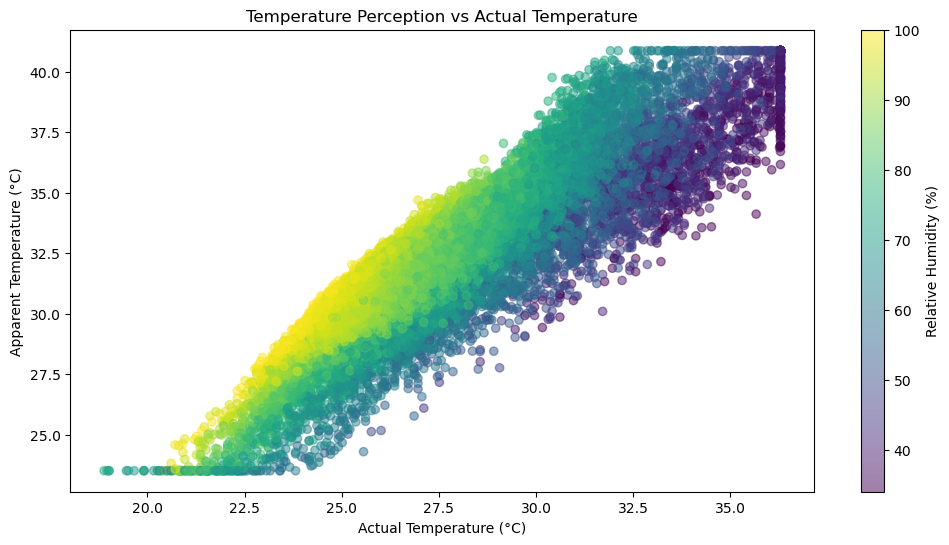

<Figure size 1200x600 with 0 Axes>

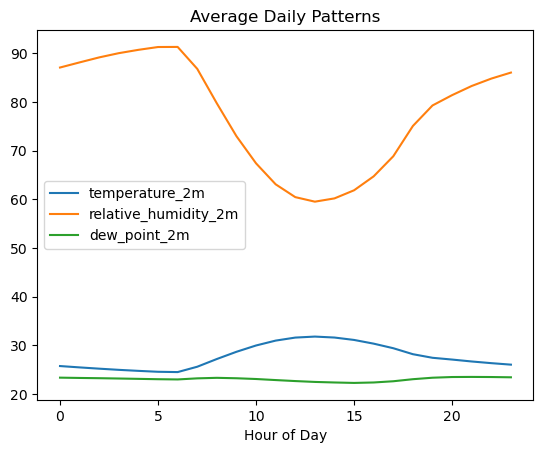


Pollution levels by weather condition:
                       pm2_5       pm10  temperature_2m  wind_speed_10m
weather_status                                                        
Clear Sky         20.475097  31.116552       27.801352        9.645478
Dense Drizzle     24.533333  35.938889       26.751432        9.546518
Heavy Rain        24.702273  36.363636       26.702477       12.116367
Light Drizzle     22.087880  32.764998       28.512260        9.556173
Light Rain        21.953299  32.230711       26.965823       10.391002
Mainly Clear      25.023906  37.363222       27.573905        7.939831
Moderate Drizzle  22.575000  33.225833       27.338917        9.688858
Moderate Rain     22.841203  33.787973       27.054875       11.399812
Overcast          24.573497  36.250780       27.017097        8.681911
Partly Cloudy     25.044094  37.245388       27.882501        8.088152


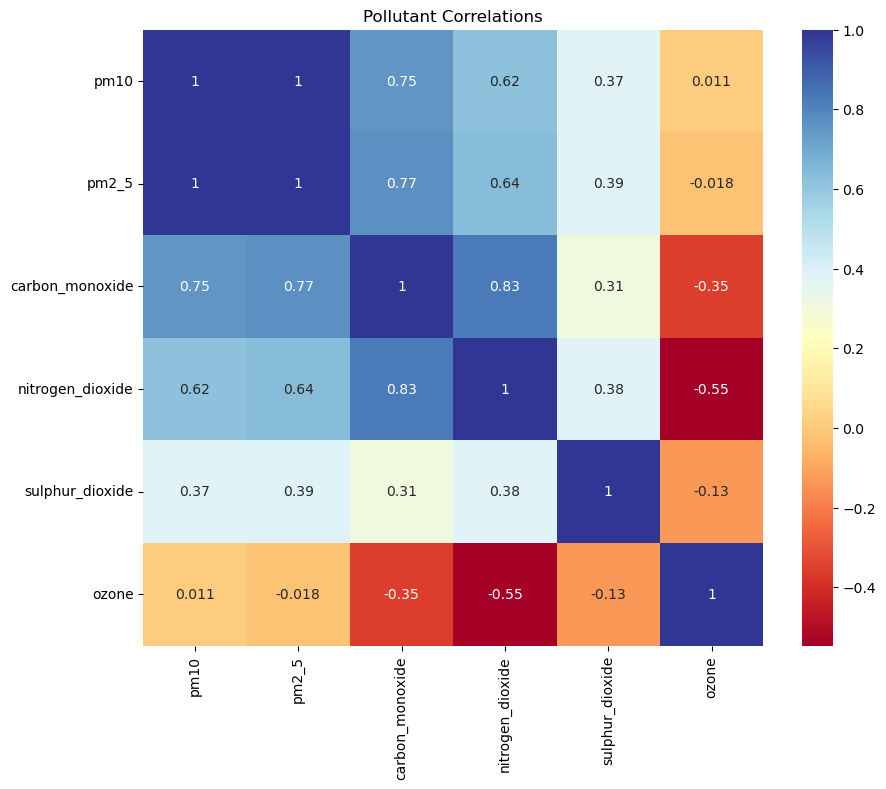

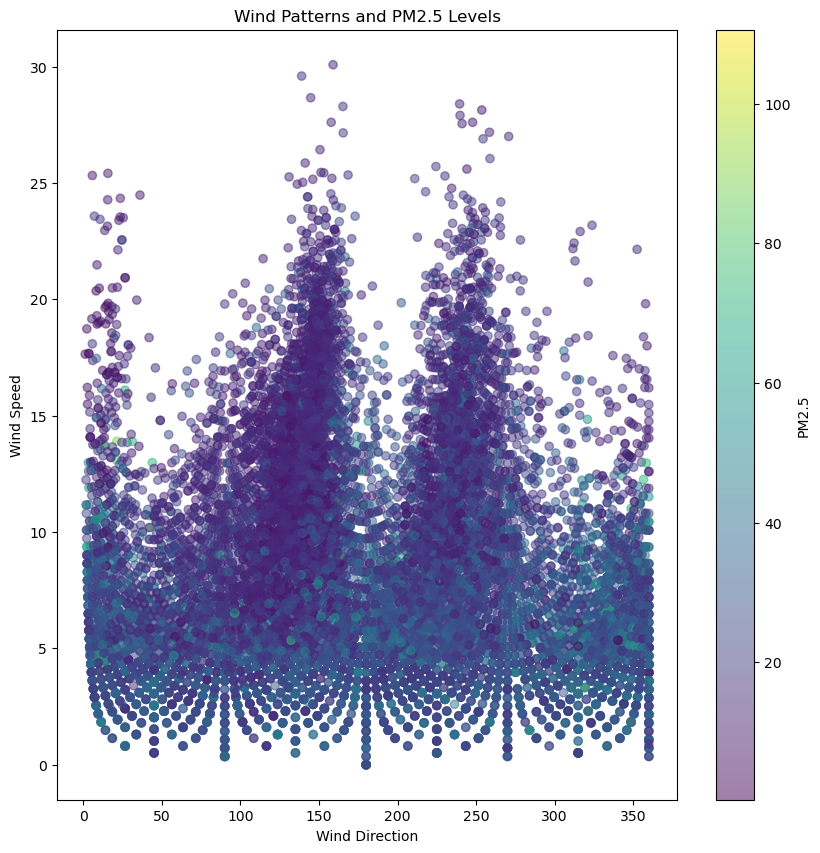

/tmp/ipykernel_8015/1030188617.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cloud_effects = df.groupby(pd.qcut(df['cloud_cover'], 4))[
/tmp/ipykernel_8015/1030188617.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_patterns = df.groupby('season')[pollutants + ['us_aqi']].mean()



Effects of Cloud Cover:
                 temperature_2m  precipitation      pm2_5
cloud_cover                                             
(-0.001, 25.8]       28.038788       0.013486  20.842498
(25.8, 35.1]         27.195218       0.036917  25.432549
(35.1, 53.7]         28.208694       0.147360  24.269979
(53.7, 100.0]        27.417169       0.849349  23.265182

Seasonal Pollution Patterns:
              pm10      pm2_5  carbon_monoxide  nitrogen_dioxide  \
season                                                            
Winter  32.337201  21.220534       398.315838         21.258046   
Spring  34.158013  22.692468       393.339515         27.200137   
Summer  32.002876  21.819090       405.738904         28.699819   
Fall    41.467640  28.023755       593.321105         35.596524   

        sulphur_dioxide      ozone     us_aqi  
season                                         
Winter        12.783886  68.128453  69.664996  
Spring        19.417170  51.377747  72.492504  
Summer

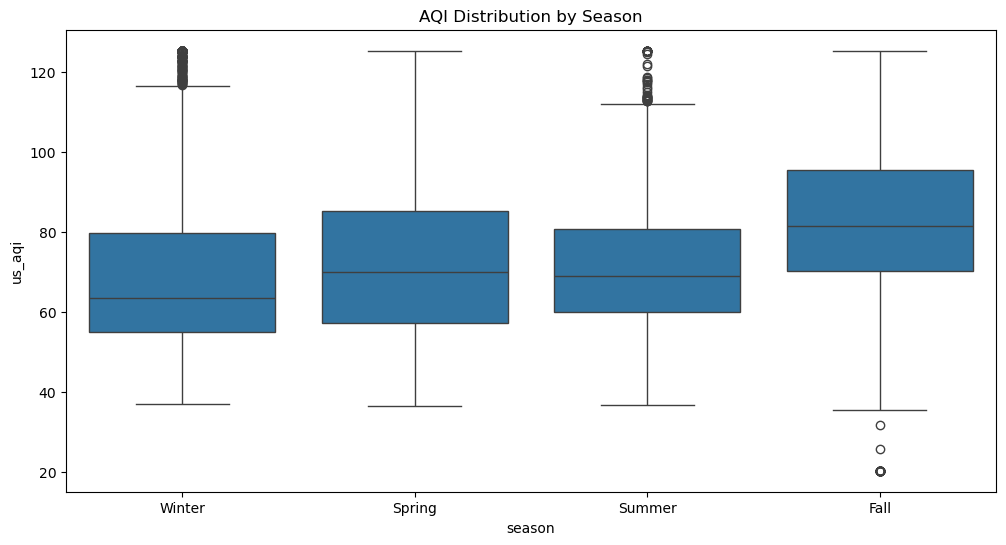

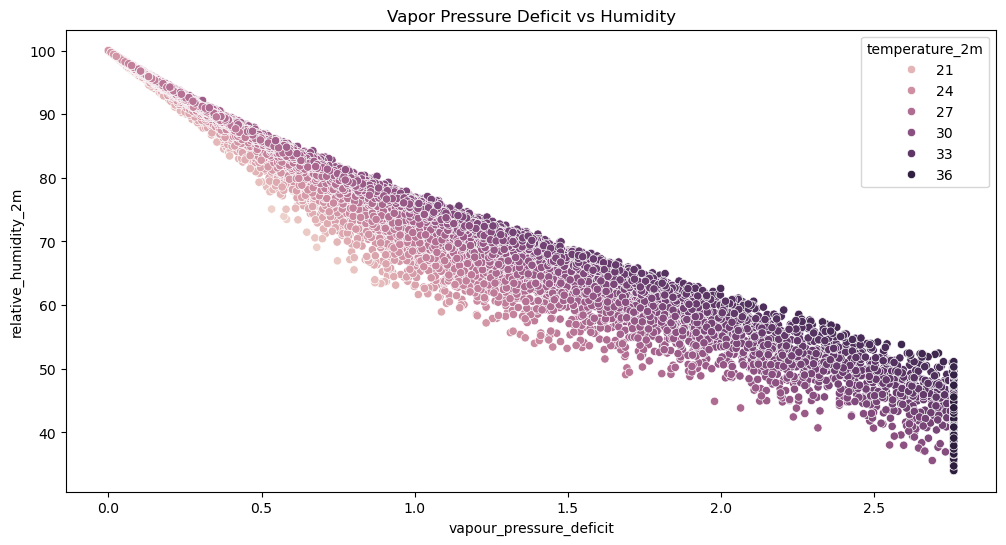


Pollution Statistics by Weather Status:
                        pm10                 pm2_5            carbon_monoxide  \
                       mean        std       mean        std            mean   
weather_status                                                                 
Clear Sky         31.116552  15.547093  20.475097  10.815878      396.777214   
Dense Drizzle     35.938889  15.487704  24.533333  10.670305      464.882716   
Heavy Rain        36.363636  13.122773  24.702273   9.050039      361.784091   
Light Drizzle     32.764998  13.596242  22.087880   9.328428      389.313193   
Light Rain        32.230711  11.989200  21.953299   8.278164      394.263959   
Mainly Clear      37.363222  18.455193  25.023906  12.857097      492.033567   
Moderate Drizzle  33.225833  13.370815  22.575000   9.251677      424.143333   
Moderate Rain     33.787973  13.179355  22.841203   9.023744      379.220490   
Overcast          36.250780  20.077048  24.573497  13.819851      484.089087  

/tmp/ipykernel_8015/1030188617.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'aqi_summary': df.groupby('season')['us_aqi'].describe(),


{'temp_comfort_corr': 0.8954321671920465,
 'pollution_weather_corr': pm10               -0.133596
 pm2_5              -0.161204
 carbon_monoxide    -0.378318
 nitrogen_dioxide   -0.460578
 sulphur_dioxide    -0.079185
 ozone               0.709145
 dtype: float64,
 'aqi_summary':          count       mean        std        min        25%        50%  \
 season                                                                  
 Winter  4344.0  69.664996  20.119787  36.874996  55.050977  63.448579   
 Spring  4368.0  72.492504  19.907371  36.388885  57.118790  69.906915   
 Summer  4416.0  70.846645  14.683973  36.579860  60.050977  68.936175   
 Fall    4416.0  83.636035  19.253147  20.203910  70.281467  81.391846   
 
               75%        max  
 season                        
 Winter  79.674198  125.38119  
 Spring  85.310284  125.38119  
 Summer  80.817821  125.38119  
 Fall    95.587324  125.38119  ,
 'extreme_conditions': weather_status
 Mainly Clear        465
 Clear Sky        

In [4]:
detailed_eda(df)